Starting training for 500 epochs...
Epoch [50/500], Loss: 8.6411, Grad Norm First: 0.000000, Grad Norm Last: 0.442452
Epoch [100/500], Loss: 8.6016, Grad Norm First: 0.000000, Grad Norm Last: 0.036758
Epoch [150/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.002980
Epoch [200/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000241
Epoch [250/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000019
Epoch [300/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000002
Epoch [350/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000001
Epoch [400/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000001
Epoch [450/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000000
Epoch [500/500], Loss: 8.6014, Grad Norm First: 0.000000, Grad Norm Last: 0.000000
Training finished.


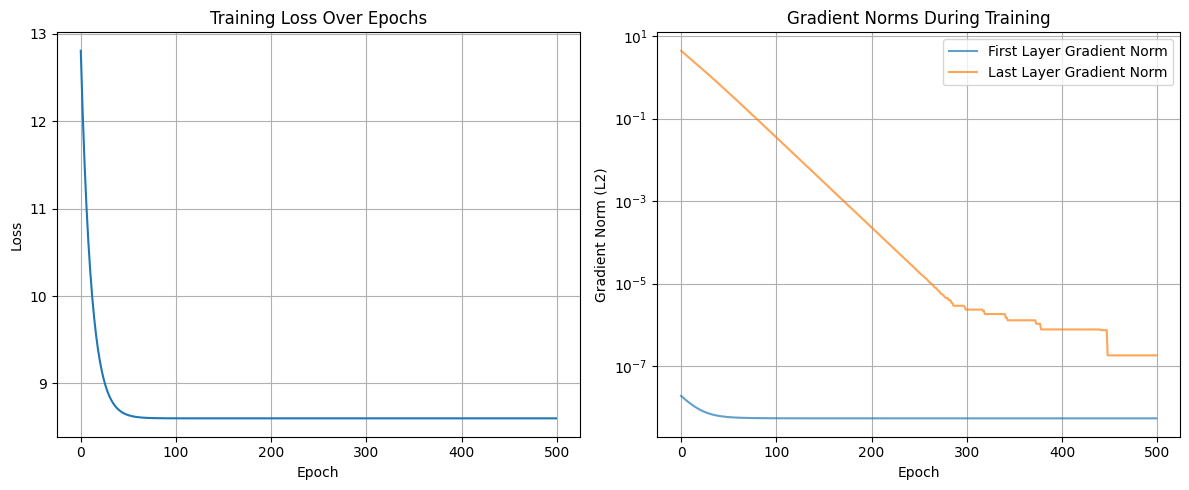


Explanation:
The left plot shows the training loss. If it decreases very slowly or plateaus quickly,
it might indicate issues like vanishing gradients, especially with Sigmoid in deep nets.
The right plot shows the L2 norm (magnitude) of the gradients for the weights of the
first and last linear layers. In the vanishing gradient problem, the norm of the gradients
for the earlier layers (like the first layer) becomes significantly smaller than for later
layers, often approaching zero. This means the weights of the earlier layers are updated
very slowly or not at all, hindering learning.

Note: Using ReLU activation instead of Sigmoid usually mitigates this problem.


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
INPUT_SIZE = 10     # Dimension of input data
HIDDEN_SIZE = 5     # Dimension of hidden layers
OUTPUT_SIZE = 1     # Dimension of output data
NUM_LAYERS = 10     # Number of hidden layers (make it deep to see the effect)
LEARNING_RATE = 0.01
NUM_EPOCHS = 500
BATCH_SIZE = 16

# --- Create a Deep Neural Network ---
class DeepNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(DeepNet, self).__init__()
        layers = []
        # Input layer
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.Sigmoid()) # Using Sigmoid, prone to vanishing gradients

        # Hidden layers
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.Sigmoid()) # Using Sigmoid

        # Output layer
        layers.append(nn.Linear(hidden_size, output_size))
        # No activation for regression, or use Sigmoid/Softmax for classification

        # Combine all layers into a sequential model
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# --- Generate Dummy Data ---
# Create random input data (features)
X = torch.randn(BATCH_SIZE * 10, INPUT_SIZE)
# Create corresponding target data (labels) - simple linear relationship for demo
# We add some noise to make it slightly more realistic
true_weights = torch.randn(INPUT_SIZE, OUTPUT_SIZE)
true_bias = torch.randn(OUTPUT_SIZE)
y = X @ true_weights + true_bias + torch.randn(BATCH_SIZE * 10, OUTPUT_SIZE) * 0.1

# --- Initialize Model, Loss, and Optimizer ---
model = DeepNet(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

# --- Training Loop ---
losses = []
gradient_norms_first_layer = []
gradient_norms_last_layer = []

print(f"Starting training for {NUM_EPOCHS} epochs...")
for epoch in range(NUM_EPOCHS):
    # Simple batching (using the whole dataset as one batch for simplicity here)
    # In practice, you'd iterate over mini-batches
    optimizer.zero_grad()  # Clear previous gradients

    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass (calculate gradients)
    loss.backward()

    # --- Observe Gradients (Optional but key for vanishing gradient) ---
    # Get the gradient norm for the first linear layer's weights
    first_layer_grad_norm = torch.norm(model.network[0].weight.grad).item()
    gradient_norms_first_layer.append(first_layer_grad_norm)

    # Get the gradient norm for the last linear layer's weights
    # The index depends on the number of layers (Linear + Activation)
    last_linear_layer_index = (NUM_LAYERS * 2) # Index of the last Linear layer
    last_layer_grad_norm = torch.norm(model.network[last_linear_layer_index].weight.grad).item()
    gradient_norms_last_layer.append(last_layer_grad_norm)
    # --------------------------------------------------------------------

    # Update weights
    optimizer.step()

    # Store loss for plotting
    losses.append(loss.item())

    # Print progress
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}, Grad Norm First: {first_layer_grad_norm:.6f}, Grad Norm Last: {last_layer_grad_norm:.6f}')

print("Training finished.")

# --- Plotting ---
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Gradient Norms
plt.subplot(1, 2, 2)
plt.plot(gradient_norms_first_layer, label='First Layer Gradient Norm', alpha=0.7)
plt.plot(gradient_norms_last_layer, label='Last Layer Gradient Norm', alpha=0.7)
plt.title('Gradient Norms During Training')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm (L2)')
plt.yscale('log') # Use log scale to see small values better
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Explanation:
The left plot shows the training loss. If it decreases very slowly or plateaus quickly,
it might indicate issues like vanishing gradients, especially with Sigmoid in deep nets.
The right plot shows the L2 norm (magnitude) of the gradients for the weights of the
first and last linear layers. In the vanishing gradient problem, the norm of the gradients
for the earlier layers (like the first layer) becomes significantly smaller than for later
layers, often approaching zero. This means the weights of the earlier layers are updated
very slowly or not at all, hindering learning.

Note: Using ReLU activation instead of Sigmoid usually mitigates this problem.